# How to handle Categorical Missing Values.

## Frequent Category Imputation.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import numpy as np

In [2]:
df = pd.read_csv("D:/Datasets/train.csv",usecols=['BsmtQual','FireplaceQu',
                                                 'GarageType','SalePrice'])

In [3]:
df.head()

,BsmtQual,FireplaceQu,GarageType,SalePrice
0,Gd,NaN,Attchd,208500
1,Gd,TA,Attchd,181500
2,Gd,TA,Attchd,223500
3,TA,Gd,Detchd,140000
4,Gd,TA,Attchd,250000


In [4]:
df.isnull().sum()

BsmtQual        37
FireplaceQu    690
GarageType      81
SalePrice        0
dtype: int64

In [5]:
# Finding the missing percentage of the categorical values.
df.isnull().mean().sort_values(ascending=True)

SalePrice      0.000000
BsmtQual       0.025342
GarageType     0.055479
FireplaceQu    0.472603
dtype: float64

# Compute the frequency with every feature.

<AxesSubplot:>

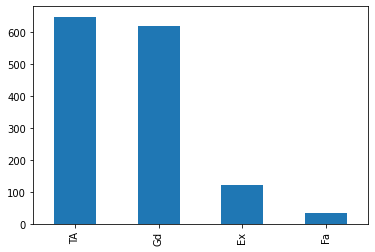

In [6]:
df['BsmtQual'].value_counts().plot.bar()

<AxesSubplot:>

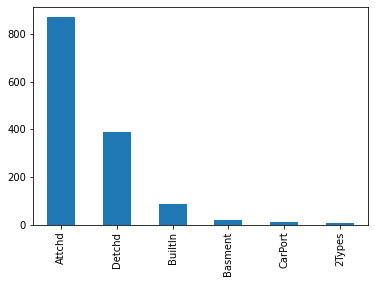

In [7]:
df['GarageType'].value_counts().plot.bar()

<AxesSubplot:>

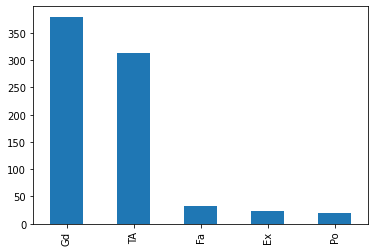

In [8]:
df['FireplaceQu'].value_counts().plot.bar()

## Replacing nan value

In [9]:
def impute_nan(df,variable):
    most_frequent_category = df[variable].value_counts().index[0] ## or df[variable].mode()[0]
    df[variable].fillna(most_frequent_category,inplace=True)

In [10]:
impute_nan(df,'BsmtQual')

In [11]:
for features in ['BsmtQual','FireplaceQu','GarageType']:
    impute_nan(df,features)

In [12]:
df.isnull().sum()

BsmtQual       0
FireplaceQu    0
GarageType     0
SalePrice      0
dtype: int64

## Advantages:
1. Easy to implement
2. Faster way to implement

## Disadvantages:
1. It may use the most frequent labels in over represented way, if there are many NAN values.
2. It distorts the relation of the most frequent label.***DONT USE THIS TECHNIQUE WHEN THE NAN VALUES ARE VERY LARGE.***

# Adding a variable to capture NAN values

In [13]:
df = pd.read_csv('D:\\Datasets\\train.csv',usecols=['BsmtQual','FireplaceQu','GarageType','SalePrice'])
df.head()

,BsmtQual,FireplaceQu,GarageType,SalePrice
0,Gd,NaN,Attchd,208500
1,Gd,TA,Attchd,181500
2,Gd,TA,Attchd,223500
3,TA,Gd,Detchd,140000
4,Gd,TA,Attchd,250000


In [14]:
df.isnull().sum()

BsmtQual        37
FireplaceQu    690
GarageType      81
SalePrice        0
dtype: int64

In [15]:
df_copy = df.copy()

In [16]:
# making a new feature out of categorical missing values.
df_copy['BsmtQual'] = np.where(df_copy['BsmtQual'].isnull(),1,0)

In [17]:
df_copy.isnull().sum()

BsmtQual         0
FireplaceQu    690
GarageType      81
SalePrice        0
dtype: int64

In [18]:
# capturing the most frequent category.
df_copy['GarageType'].fillna(df['GarageType'].mode()[0],inplace=True)

In [19]:
df_copy.isnull().sum()

BsmtQual         0
FireplaceQu    690
GarageType       0
SalePrice        0
dtype: int64

In [20]:
def impute_nan(df,variable):
    ## First capturing the importance of the nan value.
    df[variable+'_nan'] = np.where(df[variable].isnull(),1,0)
    ## Filling the Nan values with the most frquent value.
    df[variable].fillna(df[variable].mode()[0],inplace=True)

for features in ['BsmtQual','FireplaceQu','GarageType']:
    impute_nan(df,features)

In [21]:
df.isnull().sum()

BsmtQual           0
FireplaceQu        0
GarageType         0
SalePrice          0
BsmtQual_nan       0
FireplaceQu_nan    0
GarageType_nan     0
dtype: int64

In [22]:
df

,BsmtQual,FireplaceQu,GarageType,SalePrice,BsmtQual_nan,FireplaceQu_nan,GarageType_nan
0,Gd,Gd,Attchd,208500,0,1,0
1,Gd,TA,Attchd,181500,0,0,0
2,Gd,TA,Attchd,223500,0,0,0
3,TA,Gd,Detchd,140000,0,0,0
4,Gd,TA,Attchd,250000,0,0,0
...,...,...,...,...,...,...,...
1455,Gd,TA,Attchd,175000,0,0,0
1456,Gd,TA,Attchd,210000,0,0,0
1457,TA,Gd,Attchd,266500,0,0,0
1458,TA,Gd,Attchd,142125,0,1,0


***In above we are filling the na values but also, the value 1 in new variable is indicating that , there was a Nan value.
 THIS is capturing the importance of the Nan value.***

# MOST COMMON METHOD:::Suppose if you have more frequent categories, we just replace the nan values with a new category.

In [23]:
df = pd.read_csv('D:\\Datasets\\train.csv',usecols=['BsmtQual','FireplaceQu','GarageType','SalePrice'])
df.head()

,BsmtQual,FireplaceQu,GarageType,SalePrice
0,Gd,NaN,Attchd,208500
1,Gd,TA,Attchd,181500
2,Gd,TA,Attchd,223500
3,TA,Gd,Detchd,140000
4,Gd,TA,Attchd,250000


In [24]:
df.isnull().sum()

BsmtQual        37
FireplaceQu    690
GarageType      81
SalePrice        0
dtype: int64

In [25]:
def impute_nan(df,variable):
    df[variable+'_newvar'] = np.where(df[variable].isnull(),'MissingValue',df[variable])

In [26]:
for features in ['BsmtQual','FireplaceQu','GarageType']:
    impute_nan(df,features)

In [27]:
df

,BsmtQual,FireplaceQu,GarageType,SalePrice,BsmtQual_newvar,FireplaceQu_newvar,GarageType_newvar
0,Gd,NaN,Attchd,208500,Gd,MissingValue,Attchd
1,Gd,TA,Attchd,181500,Gd,TA,Attchd
2,Gd,TA,Attchd,223500,Gd,TA,Attchd
3,TA,Gd,Detchd,140000,TA,Gd,Detchd
4,Gd,TA,Attchd,250000,Gd,TA,Attchd
...,...,...,...,...,...,...,...
1455,Gd,TA,Attchd,175000,Gd,TA,Attchd
1456,Gd,TA,Attchd,210000,Gd,TA,Attchd
1457,TA,Gd,Attchd,266500,TA,Gd,Attchd
1458,TA,NaN,Attchd,142125,TA,MissingValue,Attchd


***Then drop the original features and use the new one with the dependent feature. THIS IS THE MOST COMMON METHOD.***

In [29]:
for features in ['BsmtQual','FireplaceQu','GarageType']:
    df.drop(features,axis=1,inplace=True)

In [30]:
df

,SalePrice,BsmtQual_newvar,FireplaceQu_newvar,GarageType_newvar
0,208500,Gd,MissingValue,Attchd
1,181500,Gd,TA,Attchd
2,223500,Gd,TA,Attchd
3,140000,TA,Gd,Detchd
4,250000,Gd,TA,Attchd
...,...,...,...,...
1455,175000,Gd,TA,Attchd
1456,210000,Gd,TA,Attchd
1457,266500,TA,Gd,Attchd
1458,142125,TA,MissingValue,Attchd
